# Données

In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
metadata = pd.read_csv("metadata/UrbanSound8K.csv")

UrbanSound8K : 10 classes de bruits répartis en 10 folds de $\sim$ 800 échantillons.

In [3]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


On apprend sur des représentations intermédiaires du signal sonore : les Mel-Frequency Cesptral Coefficients.


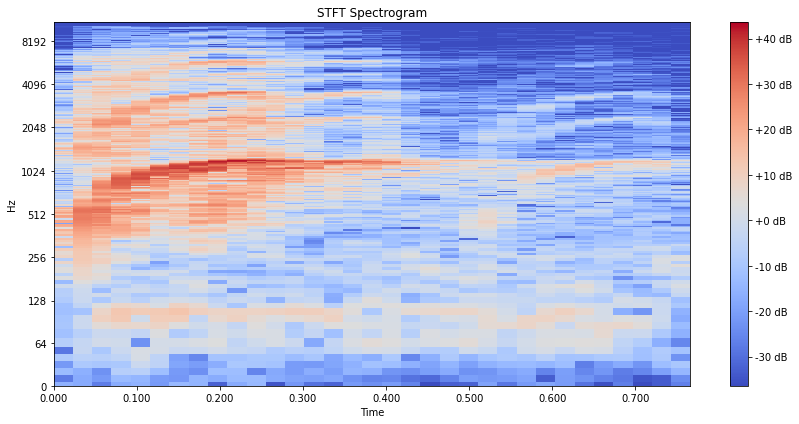

In [43]:
row = metadata.sample(1)
file_path = "audio" + '/fold'+ str(row.iloc[0,5]) +'/' + str(row.iloc[0,0])

n_fft=2048
hop_length=512

y, sr = librosa.load(file_path)
normalized_y = librosa.util.normalize(y)
stft = librosa.core.stft(normalized_y, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(abs(stft))

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB');
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.show()

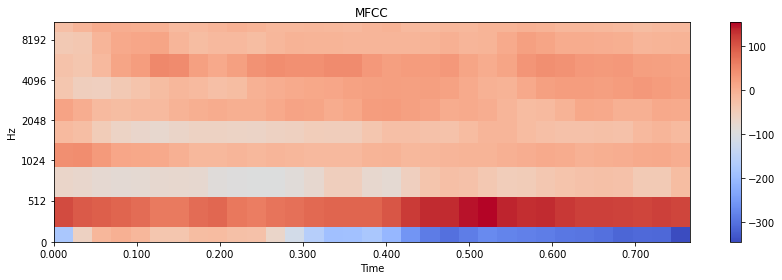

In [44]:
mfcc = librosa.feature.mfcc(normalized_y, sr, n_mfcc=10)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [6]:
row

,slice_file_name,fsID,start,end,salience,fold,classID,class
4339,180937-7-2-10.wav,180937,257.163479,261.163479,1,1,7,jackhammer


In [7]:
samples = metadata.sample(500)

In [8]:
array = []
for i in range(10):
    s = samples[samples.classID == i].sample(5)
    for j in range(5):
        file_path = "audio" + '/fold'+ str(s.iloc[j,5]) +'/' + str(s.iloc[j,0])
        y, sr = librosa.load(file_path)
        normalized_y = librosa.util.normalize(y)
        stft = librosa.core.stft(normalized_y, n_fft=n_fft, hop_length=hop_length)
        stft_db = librosa.amplitude_to_db(abs(stft))
        array.append(stft_db)

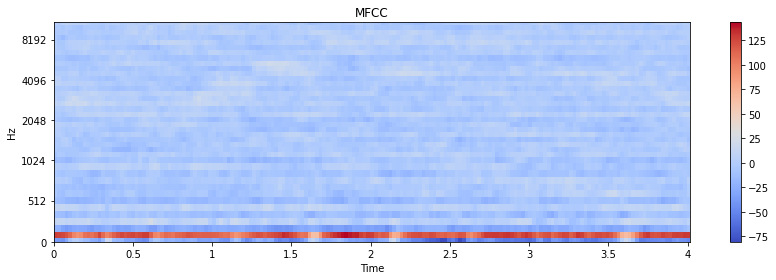

In [10]:
mfcc = librosa.feature.mfcc(normalized_y, sr, n_mfcc=10)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


### Aperçu des spectrogrammes des différentes classes

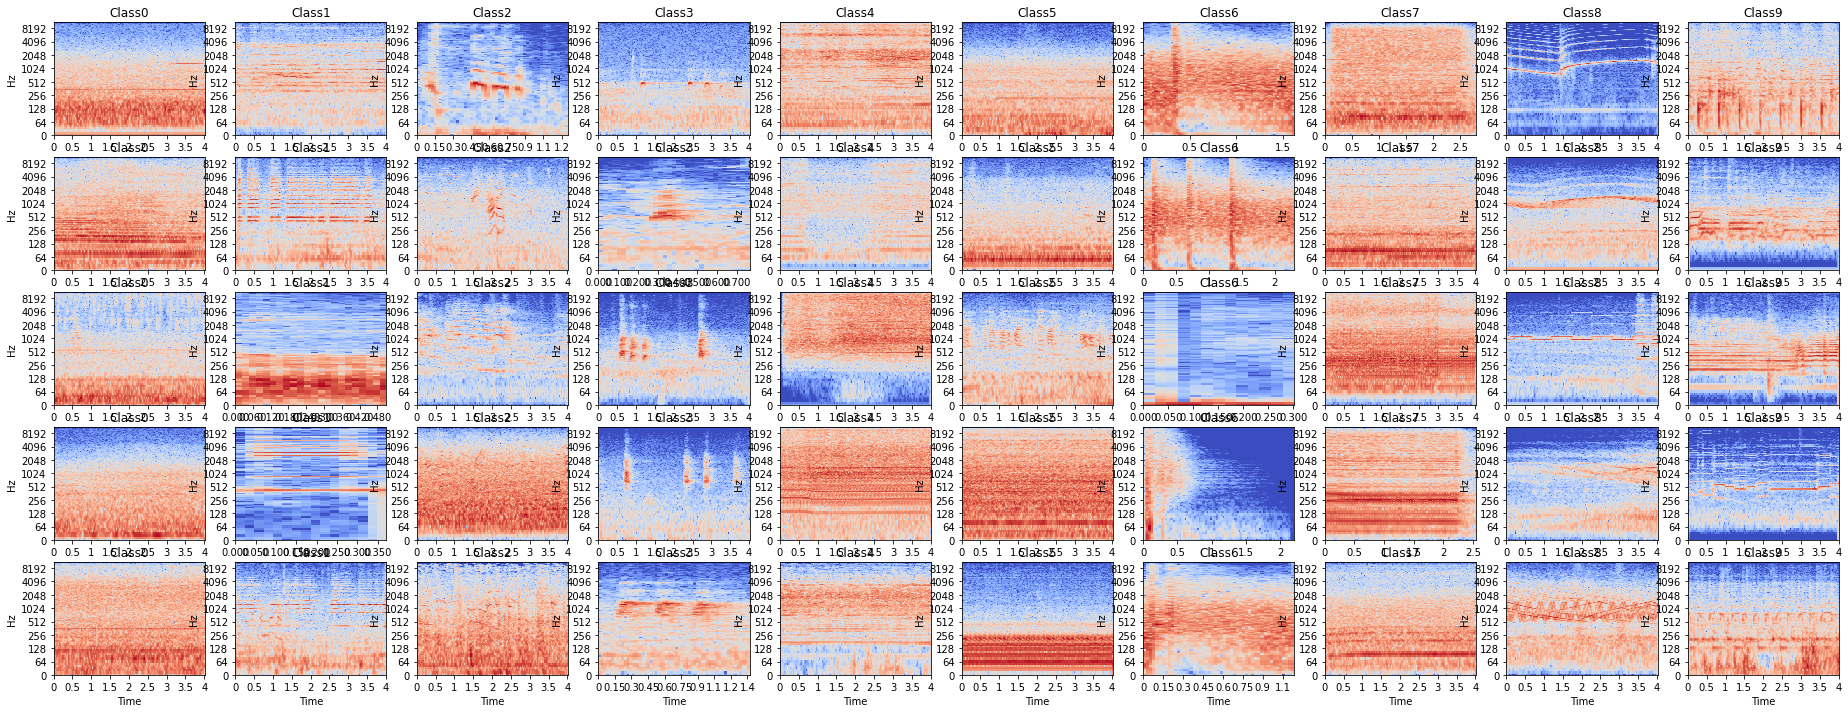

In [10]:
fig, axs = plt.subplots(5, 10, figsize=(32,12))
for i in range(50):
        librosa.display.specshow(array[i], x_axis='time', y_axis='log', ax=axs[i%5,i//5])
        axs[i%5,i//5].set(title="Class" + str(i//5))


# Apprentissage

### Données
Train set = fold1

Test set = fold2

In [13]:
train = metadata[metadata['fold'] == 1].to_numpy()
mfcc = []
for i in range(len(train)):
        file_path = "audio" + '/fold'+ str(train[i][5]) +'/' + str(train[i][0])
        y, sr = librosa.load(file_path)
        normalized_y = librosa.util.normalize(y)
        m = librosa.feature.mfcc(normalized_y, sr, n_mfcc=10)
        mfcc.append(m)

/home/theodor/.local/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
/home/theodor/.local/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
/home/theodor/.local/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(


In [14]:
y_train = metadata[metadata['fold'] == 1]['classID'].to_numpy()

In [15]:
mfcc_train = [x for x in mfcc if len(x[0])==173]
y_train = [y_train[i] for i in range(len(y_train)) if len(mfcc[i][0]) == 173]
len(y_train)

743

In [16]:
mfcc_train = np.array(mfcc_train).transpose(0,2,1)

In [17]:
np.savetxt("y_train.csv", y_train, delimiter=",")

In [19]:
test = metadata[metadata['fold'] == 2].to_numpy()
mfcc = []
for i in range(len(test)):
        file_path = "audio" + '/fold'+ str(test[i][5]) +'/' + str(test[i][0])
        y, sr = librosa.load(file_path)
        normalized_y = librosa.util.normalize(y)
        m = librosa.feature.mfcc(normalized_y, sr, n_mfcc=10)
        mfcc.append(m)

/home/theodor/.local/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(


In [20]:
y_test = metadata[metadata['fold'] == 2]['classID'].to_numpy()

In [21]:
mfcc_test = [x for x in mfcc if len(x[0])==173]
y_test = [y_test[i] for i in range(len(y_test)) if len(mfcc[i][0]) == 173]


In [22]:
mfcc_test = np.array(mfcc_test).transpose(0,2,1)

In [23]:
np.savetxt("y_test.csv", y_test, delimiter=",")

### Signature kernel

In [24]:
import ksig

In [36]:
n_levels = 3
n_order = 1
n_components = 19

In [37]:
static_kernel = ksig.static.kernels.RBFKernel()
proj = ksig.projections.CountSketchRandomProjection(n_components=n_components)
static_feat = ksig.static.features.NystroemFeatures(static_kernel, n_components=n_components)

lr_sig_kernel = ksig.kernels.LowRankSignatureKernel(order=n_order, n_levels=n_levels, static_features=static_feat, sigma=10)
lr_sig_kernel.fit(mfcc_train)


LowRankSignatureKernel(n_levels=3, order=1, sigma=10,
                       static_features=NystroemFeatures(n_components=19,
                                                        static_kernel=RBFKernel()))

In [38]:
K_XX = lr_sig_kernel(mfcc_train)

In [39]:
from sklearn.svm import SVC

In [40]:
clf = SVC(C=100., kernel='precomputed')
clf.fit(K_XX, y_train)
kernel_test = lr_sig_kernel(mfcc_test, mfcc_train)
y_pred = clf.predict(kernel_test)

In [41]:
acc = ( ((y_pred == y_test).sum()/len(y_pred)) )
acc

0.13741496598639455

### Signature Boosting

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [18]:
import esig

In [ ]:
esig.stream2sig()

In [ ]:
d = 3
sig_train = [esig.stream2sig(x, d) for x in mfcc_train]